In [60]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import f1_score

# Load the dataset
df = pd.read_csv('startups_data_cleaned_step1.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12306 entries, 0 to 12305
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  12306 non-null  object 
 1   market                12306 non-null  object 
 2   funding_total_usd     12306 non-null  float64
 3   country_code          12306 non-null  object 
 4   state_code            12301 non-null  object 
 5   region                12306 non-null  object 
 6   city                  12291 non-null  object 
 7   funding_rounds        12306 non-null  int64  
 8   founded_at            12306 non-null  object 
 9   founded_month         12306 non-null  int64  
 10  founded_quarter       12306 non-null  int64  
 11  founded_year          12306 non-null  int64  
 12  first_funding_at      12306 non-null  object 
 13  last_funding_at       12306 non-null  object 
 14  seed                  12306 non-null  int64  
 15  venture            

In [7]:
#Data Preprocessing

In [10]:
# Create copy of dataframe
df_processed = df.copy()

# Convert date columns to datetime
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for col in date_columns:
    df_processed[col] = pd.to_datetime(df_processed[col])

In [12]:
# Create temporal features
df_processed['days_to_first_funding'] = (df_processed['first_funding_at'] - df_processed['founded_at']).dt.days
df_processed['funding_duration'] = (df_processed['last_funding_at'] - df_processed['first_funding_at']).dt.days
df_processed['company_age'] = (pd.Timestamp('2024-01-01') - df_processed['founded_at']).dt.days

In [14]:
# Fill NaN values
df_processed['days_to_first_funding'] = df_processed['days_to_first_funding'].fillna(-1)
df_processed['funding_duration'] = df_processed['funding_duration'].fillna(0)
df_processed['company_age'] = df_processed['company_age'].fillna(-1)

In [16]:
# Now check for negative values in 'days_to_first_funding'
negative_days_to_funding = df_processed[df_processed['days_to_first_funding'] < 0]

In [18]:
negative_days_to_funding.loc[:,['founded_at','first_funding_at','days_to_first_funding']]

,founded_at,first_funding_at,days_to_first_funding
6,2014-10-10,2014-10-07,-3
7,2014-10-01,2014-09-14,-17
12,2014-09-18,2014-09-14,-4
23,2014-09-01,2013-08-06,-391
24,2014-09-01,2013-01-16,-593
...,...,...,...
12253,1999-01-01,1996-12-31,-731
12275,1998-11-28,1998-01-01,-331
12280,1998-01-01,1997-09-30,-93
12299,1996-01-01,1995-01-01,-365


In [20]:
# Drop rows where 'days_to_first_funding' is negative
df_processed = df_processed[df_processed['days_to_first_funding'] >= 0]

In [22]:
df_processed.columns

Index(['name', 'market', 'funding_total_usd', 'country_code', 'state_code',
       'region', 'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'category_count', 'clean_name', 'is_operating', 'category_updated',
       'days_to_first_funding', 'funding_duration', 'company_age'],
      dtype='object')

In [24]:
df_processed

,name,market,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,...,round_F,round_G,round_H,category_count,clean_name,is_operating,category_updated,days_to_first_funding,funding_duration,company_age
0,Le HerbÈ,Medical Marijuana Patients,100000.0,USA,WA,Seattle,Seattle,1,2014-12-01,12,...,0,0,0,3,le herbè,1,Healthcare,0,0,3318
1,Kandid,Apps,1400000.0,USA,CA,SF Bay Area,San Francisco,1,2014-11-19,11,...,0,0,0,1,kandid,1,Technology,13,0,3330
2,The Manly Man Can,Fashion,30.0,USA,MI,Detroit,Pinckney,1,2014-10-26,10,...,0,0,0,1,the manly man can,1,Fashion & Lifestyle,1,0,3354
3,MyKidsCalendar,Software,110000.0,USA,NJ,Newark,Long Valley,1,2014-10-22,10,...,0,0,0,1,mykidscalendar,1,Technology,0,0,3358
4,Peach,Fashion,500000.0,USA,CA,SF Bay Area,Berkeley,1,2014-10-19,10,...,0,0,0,3,peach,1,Fashion & Lifestyle,4,0,3361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,XO Group,Media,19600000.0,USA,NY,New York City,New York,3,1996-01-01,1,...,0,0,0,3,xo group,1,other,0,1200,10227
12301,eBay,Business Services,6700000.0,USA,CA,SF Bay Area,San Jose,1,1995-09-01,9,...,0,0,0,6,ebay,1,Business Services,639,0,10349
12302,Arkansas Children's Hospital,Biotechnology,3500000.0,USA,AR,Little Rock,Little Rock,1,2012-01-01,1,...,0,0,0,1,arkansas children's hospital,1,Healthcare,628,0,4383
12303,Northcentral Technical College,Education,6200000.0,USA,WI,WI - Other,Antigo,1,2012-01-01,1,...,0,0,0,1,northcentral technical college,1,Education,627,0,4383


In [26]:
# Selected features (reduced set)
selected_features = [
    'funding_total_usd',
    'funding_rounds',
    'days_to_first_funding',
    'funding_duration',
    'category_count',
    'company_age'
]

In [28]:
# Encode categorical variables (reduced set)
categorical_features = ['category_updated', 'state_code']

In [30]:
# One-Hot Encoding with pandas
df_processed = pd.get_dummies(df_processed, columns=categorical_features, drop_first=False)

# Identify dummy columns
dummy_columns = [col for col in df_processed.columns if any(prefix in col for prefix in categorical_features)]

# Update feature_columns
feature_columns = selected_features + dummy_columns

In [32]:
feature_columns

['funding_total_usd',
 'funding_rounds',
 'days_to_first_funding',
 'funding_duration',
 'category_count',
 'company_age',
 'category_updated_Business Services',
 'category_updated_Education',
 'category_updated_Energy & Environment',
 'category_updated_Fashion & Lifestyle',
 'category_updated_Finance',
 'category_updated_Healthcare',
 'category_updated_Media & Entertainment',
 'category_updated_Retail & E-Commerce',
 'category_updated_Technology',
 'category_updated_Transport & Automotive',
 'category_updated_other',
 'state_code_AK',
 'state_code_AL',
 'state_code_AR',
 'state_code_AZ',
 'state_code_CA',
 'state_code_CO',
 'state_code_CT',
 'state_code_DC',
 'state_code_DE',
 'state_code_FL',
 'state_code_GA',
 'state_code_HI',
 'state_code_IA',
 'state_code_ID',
 'state_code_IL',
 'state_code_IN',
 'state_code_KS',
 'state_code_KY',
 'state_code_LA',
 'state_code_MA',
 'state_code_MD',
 'state_code_ME',
 'state_code_MI',
 'state_code_MN',
 'state_code_MO',
 'state_code_MS',
 'state_

In [34]:
# Create feature matrix
X = df_processed[feature_columns]
y = df_processed['is_operating']

In [36]:
X

,funding_total_usd,funding_rounds,days_to_first_funding,funding_duration,category_count,company_age,category_updated_Business Services,category_updated_Education,category_updated_Energy & Environment,category_updated_Fashion & Lifestyle,...,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
0,100000.0,1,0,0,3,3318,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,1400000.0,1,13,0,1,3330,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,30.0,1,1,0,1,3354,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,110000.0,1,0,0,1,3358,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,500000.0,1,4,0,3,3361,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,19600000.0,3,0,1200,3,10227,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12301,6700000.0,1,639,0,6,10349,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12302,3500000.0,1,628,0,1,4383,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12303,6200000.0,1,627,0,1,4383,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [38]:
#Build the Logistic Regression Model

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_curve

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Evaluation Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# True Positive Rate (TPR) or Recall
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"True Positive Rate (TPR): {TPR:.2f}")

# False Positive Rate (FPR)
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
print(f"False Positive Rate (FPR): {FPR:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

Confusion Matrix:
[[   0  364]
 [   4 1910]]
Accuracy: 0.84
True Positive Rate (TPR): 1.00
False Positive Rate (FPR): 1.00
Precision: 0.84


In [42]:
#Since the data is very imbalanced, check the distributions

In [44]:
print("Training Set Distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest Set Distribution:")
print(y_test.value_counts(normalize=True))

Training Set Distribution:
is_operating
1    0.840031
0    0.159969
Name: proportion, dtype: float64

Test Set Distribution:
is_operating
1    0.840211
0    0.159789
Name: proportion, dtype: float64


In [54]:
#Before balancing the dataset, scale the data to account for any feature scaling issues 

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test using the same scaler
X_test_scaled = scaler.transform(X_test)

In [62]:
#Applying the class weights as follows

# Train the model on the scaled data
balanced_model = LogisticRegression(class_weight='balanced', random_state=42)
balanced_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = balanced_model.predict(X_test_scaled)

#Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# True Positive Rate (Recall)
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"True Positive Rate (TPR): {TPR:.2f}")

# False Positive Rate
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
print(f"False Positive Rate (FPR): {FPR:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

#F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 272   92]
 [ 430 1484]]
Accuracy: 0.77
True Positive Rate (TPR): 0.78
False Positive Rate (FPR): 0.25
Precision: 0.94
F1 Score: 0.85


In [71]:
# Get predicted probabilities for the positive class (class 1)
y_pred_proba = balanced_model.predict_proba(X_test_scaled)[:, 1]  # This gives the probability for class 1

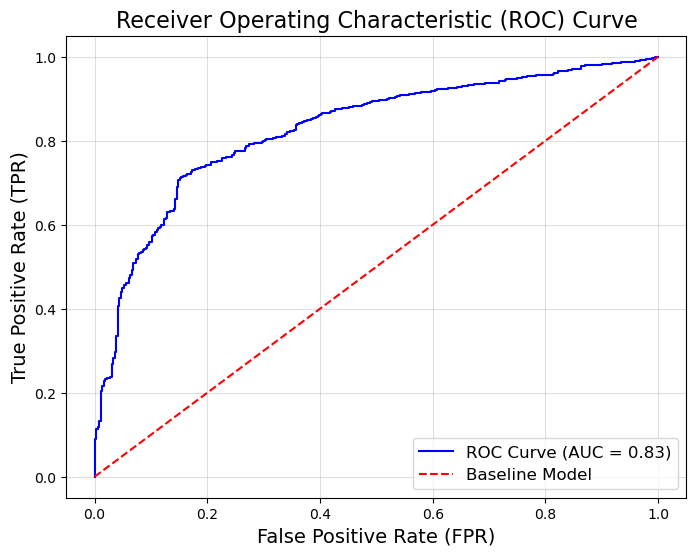

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
auc_value = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.2f})", color='blue')
plt.plot([0, 1], [0, 1], '--', label='Baseline Model', color='red')  # Dashed red line for Baseline Model
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

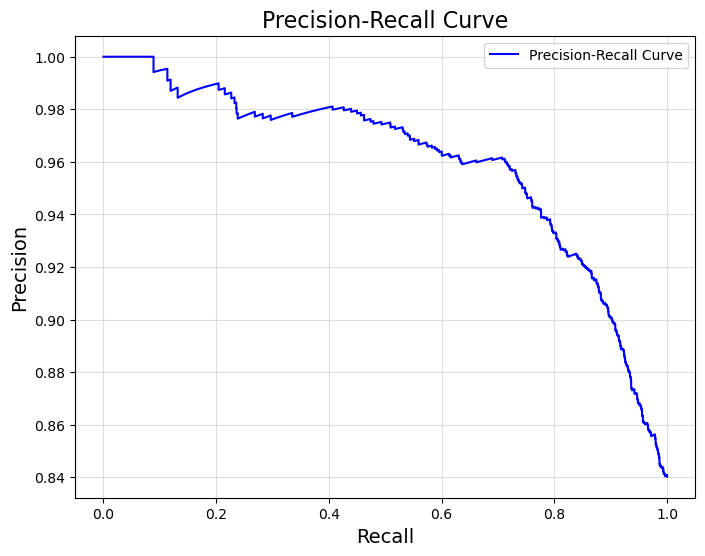

In [77]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color="blue")
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [79]:
#Check the feature importance

In [81]:
# Get the coefficients
coefficients = balanced_model.coef_[0]  # for binary classification, model.coef_ is a 2D array, we select the first row

In [83]:
# Create a DataFrame for easy visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # Column names from your training data
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients to identify the most important features
feature_importance['abs_coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False)

# Display the sorted features
print(feature_importance[['Feature', 'Coefficient', 'abs_coeff']])

                  Feature  Coefficient  abs_coeff
5             company_age    -1.704918   1.704918
3        funding_duration     0.934416   0.934416
2   days_to_first_funding     0.769953   0.769953
33          state_code_KS     0.318575   0.318575
43          state_code_MT     0.254463   0.254463
..                    ...          ...        ...
49          state_code_NM     0.007301   0.007301
56          state_code_RI     0.004750   0.004750
25          state_code_DE     0.003460   0.003460
42          state_code_MS     0.002583   0.002583
44          state_code_NC    -0.002411   0.002411

[68 rows x 3 columns]


In [62]:
X_train.columns

Index(['funding_total_usd', 'funding_rounds', 'days_to_first_funding',
       'funding_duration', 'category_count', 'company_age',
       'category_updated_Business Services', 'category_updated_Education',
       'category_updated_Energy & Environment',
       'category_updated_Fashion & Lifestyle', 'category_updated_Finance',
       'category_updated_Healthcare', 'category_updated_Media & Entertainment',
       'category_updated_Retail & E-Commerce', 'category_updated_Technology',
       'category_updated_Transport & Automotive', 'category_updated_other',
       'state_code_AK', 'state_code_AL', 'state_code_AR', 'state_code_AZ',
       'state_code_CA', 'state_code_CO', 'state_code_CT', 'state_code_DC',
       'state_code_DE', 'state_code_FL', 'state_code_GA', 'state_code_HI',
       'state_code_IA', 'state_code_ID', 'state_code_IL', 'state_code_IN',
       'state_code_KS', 'state_code_KY', 'state_code_LA', 'state_code_MA',
       'state_code_MD', 'state_code_ME', 'state_code_MI', 'sta

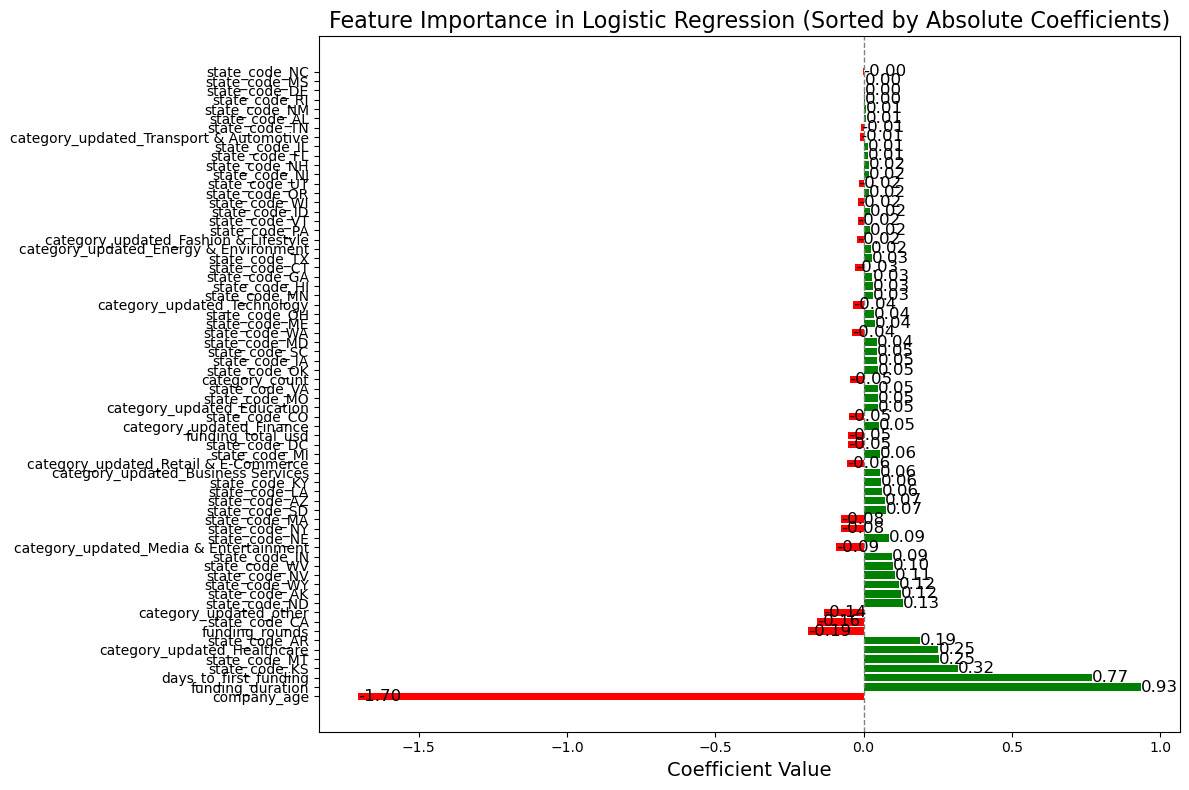

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the features by the absolute value of the coefficient to highlight the most important ones
feature_importance_sorted = feature_importance.sort_values(by='abs_coeff', ascending=False)

# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot bars with color-coding for positive and negative coefficients
colors = ['green' if coef > 0 else 'red' for coef in feature_importance_sorted['Coefficient']]

# Create horizontal bar plot
bars = plt.barh(feature_importance_sorted['Feature'], feature_importance_sorted['Coefficient'], color=colors)

# Add labels to the bars (show coefficient values)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black', fontsize=12)

# Adding labels and title
plt.xlabel("Coefficient Value", fontsize=14)
plt.title("Feature Importance in Logistic Regression (Sorted by Absolute Coefficients)", fontsize=16)

# Adding a vertical line at 0 for better distinction between positive and negative coefficients
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()

In [126]:
#Select top 10 features
top_n = 10 
selected_features_top_10 = feature_importance_sorted.head(top_n)['Feature'].tolist()
print("Selected Top 10 Features:", selected_features_top_10)

Selected Top 10 Features: ['company_age', 'funding_duration', 'days_to_first_funding', 'state_code_KS', 'state_code_MT', 'category_updated_Healthcare', 'state_code_AR', 'funding_rounds', 'state_code_CA', 'category_updated_other']


In [100]:
#Build a model using these selected features

# Subset the dataset to only include the selected features
X_selected = X[selected_features]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
new_model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')  # Increase max_iter and use solver='liblinear'
new_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = new_model.predict(X_test_scaled)

# Evaluate performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Evaluation Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# True Positive Rate (TPR) or Recall
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"True Positive Rate (TPR): {TPR:.2f}")

# False Positive Rate (FPR)
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
print(f"False Positive Rate (FPR): {FPR:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

#F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 252   99]
 [ 415 1512]]
Accuracy: 0.77
True Positive Rate (TPR): 0.78
False Positive Rate (FPR): 0.28
Precision: 0.94
F1 Score: 0.85


In [104]:
# Get predicted probabilities for the positive class (class 1)
y_pred_proba = new_model.predict_proba(X_test_scaled)[:, 1]  # This gives the probability for class 1

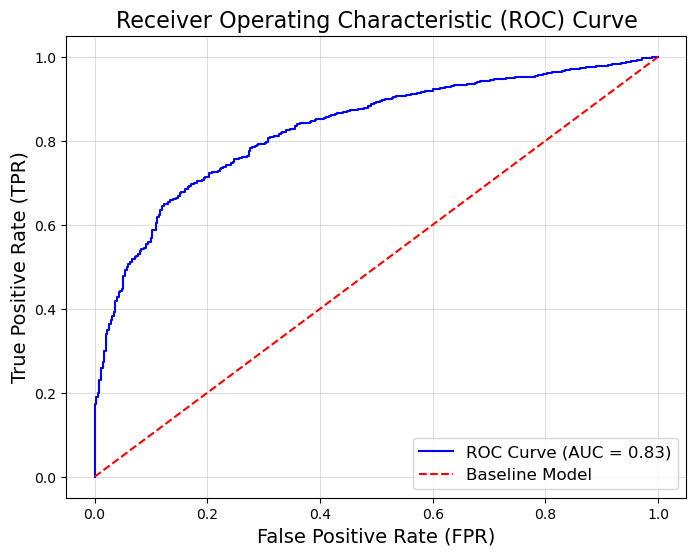

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
auc_value = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.2f})", color='blue')
plt.plot([0, 1], [0, 1], '--', label='Baseline Model', color='red')  # Dashed red line for Baseline Model
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

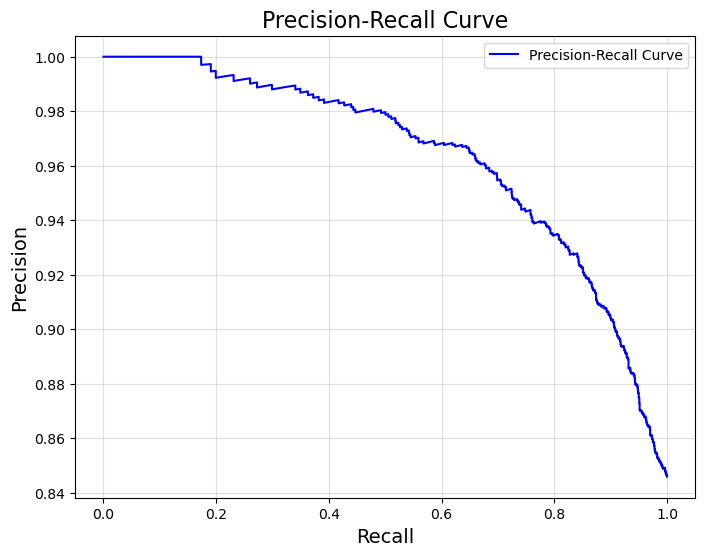

In [108]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color="blue")
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [110]:
#Select features based on a threshold to see for any improvement in any evaluation metric
#Set a threshold based on the absolute value of coefficients

threshold = 0.5  
selected_features = feature_importance_sorted[feature_importance_sorted['abs_coeff'] > threshold]['Feature'].tolist()
print("Selected Features based on Coefficient Threshold:", selected_features)

Selected Features based on Coefficient Threshold: ['company_age', 'funding_duration', 'days_to_first_funding']


In [112]:
#Build a model using these selected features

# Subset the dataset to only include the selected features
X_selected = X[selected_features]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
new_model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')  # Increase max_iter and use solver='liblinear'
new_model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = new_model.predict(X_test_scaled)

# Evaluate performance
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Evaluation Metrics
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# True Positive Rate (TPR) or Recall
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
print(f"True Positive Rate (TPR): {TPR:.2f}")

# False Positive Rate (FPR)
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
print(f"False Positive Rate (FPR): {FPR:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

#F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[ 249  102]
 [ 408 1519]]
Accuracy: 0.78
True Positive Rate (TPR): 0.79
False Positive Rate (FPR): 0.29
Precision: 0.94
F1 Score: 0.86


In [114]:
# Get predicted probabilities for the positive class (class 1)
y_pred_proba = new_model.predict_proba(X_test_scaled)[:, 1]  # This gives the probability for class 1

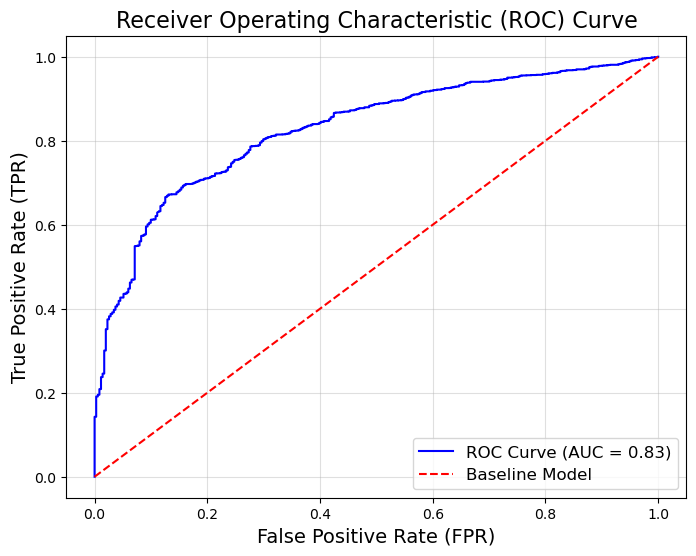

In [116]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
auc_value = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.2f})", color='blue')
plt.plot([0, 1], [0, 1], '--', label='Baseline Model', color='red')  # Dashed red line for Baseline Model
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.show()

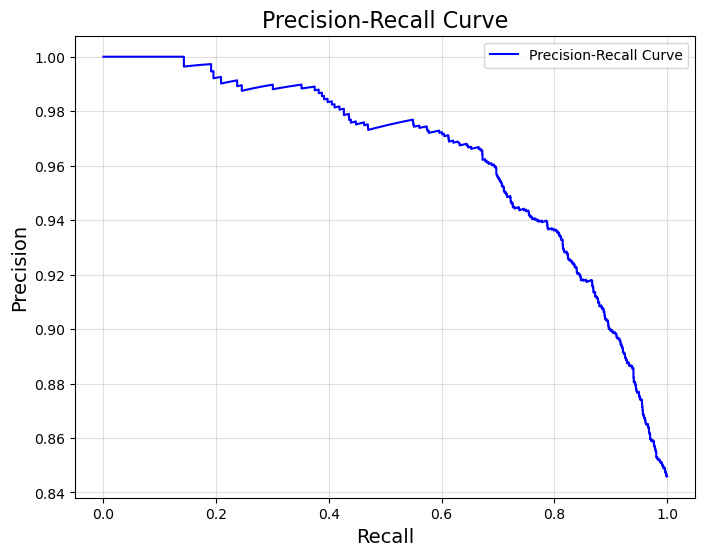

In [118]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve", color="blue")
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()